# MLP using Keras & Scikit-Optimize: Thyroid Datasets

In [1]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  names = np.unique(labels)
  #print() 
  df_cm = pd.DataFrame(cm, names,names)
  print(cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(df_cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
X_train = pd.read_csv('ann-train.data', header=None, sep=" ") 
Y_train=X_train[21]
X_train.drop([21,22,23],axis=1, inplace=True)
X_train.head()

Using TensorFlow backend.


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [2]:
print("Classes -> number of representatives:")
print(Y_train.value_counts())
times_class1 = Y_train.value_counts()[3]//Y_train.value_counts()[1]
times_class2 = Y_train.value_counts()[3]//Y_train.value_counts()[2]
print("Times more needed for class 1 -> ", times_class1)
print("Times more needed for class 2 -> ", times_class2)

Classes -> number of representatives:
3    3488
2     191
1      93
Name: 21, dtype: int64
Times more needed for class 1 ->  37
Times more needed for class 2 ->  18


In [3]:
from sklearn.utils import resample
# Resampling Techniques — Oversample minority class
    # separate minority and majority classes
    # Create more records for underrepresented classes
class1indexes = Y_train.loc[Y_train == 1]
class2indexes = Y_train.loc[Y_train == 2]
class3indexes = Y_train.loc[Y_train == 3]

#class2indexes.head()

class1 = X_train.loc[class1indexes.index]
class2 = X_train.loc[class2indexes.index]
class3 = X_train.loc[class3indexes.index]
# upsample minority
one_upsampled = resample(class1,
                          replace=True, # sample with replacement
                          n_samples=len(class3), # match number in majority class
                          random_state=27) # reproducible results
one_upsampled[21] = pd.Series(1, index=one_upsampled.index) 
print(one_upsampled.shape)
two_upsampled = resample(class2,
                          replace=True, # sample with replacement
                          n_samples=len(class3), # match number in majority class
                          random_state=27) # reproducible results
two_upsampled[21] = pd.Series(2, index=two_upsampled.index)
print(two_upsampled.shape)
two_upsampled.head()

(3488, 22)
(3488, 22)


/Users/iostaptchenko/projects/secret/wsu/ds/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/iostaptchenko/projects/secret/wsu/ds/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
695,0.76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0110,0.0120,0.086,0.085,0.101,2
3667,0.18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0120,0.0174,0.142,0.137,0.104,2
1708,0.42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0130,0.0190,0.061,0.082,0.074,2
908,0.80,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0061,0.0130,0.083,0.088,0.095,2
1462,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0075,0.0208,0.089,0.114,0.078,2


In [4]:
print("Training data shape: ",X_train.shape)
X_train[21] = Y_train
print("Training data shape with yZ: ",X_train.shape)
X_train = X_train.append(one_upsampled,ignore_index=True).append(two_upsampled,ignore_index=True).sample(frac=1)
#train.reset_index(inplace=True, drop=True)
print("New Training data shape: ",X_train.shape)
X_train.head()

Training data shape:  (3772, 21)
Training data shape with yZ:  (3772, 22)
New Training data shape:  (10748, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
5131,0.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.11700,0.0040,0.017,0.114,0.015,1
8918,0.60,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.00889,0.0174,0.075,0.097,0.077,2
7174,0.44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.19900,0.0060,0.010,0.103,0.010,1
10443,0.65,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.01200,0.0174,0.099,0.114,0.087,2
7285,0.73,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00800,0.0130,0.101,0.093,0.108,2


In [5]:
# keep the class labels of training dataframe
Y_train=X_train[21]
print("yZ of training data shape: ",Y_train.shape)
# remove lables from training dataframe
X_train.drop([21],axis=1, inplace=True)
print("training data shape: ",X_train.shape)
print("Classes -> number of representatives:")
print(Y_train.value_counts())
print(X_train.shape)

yZ of training data shape:  (10748,)
training data shape:  (10748, 21)
Classes -> number of representatives:
2    3679
1    3581
3    3488
Name: 21, dtype: int64
(10748, 21)


Plot some sample images along with their labels.

(10748, 21)


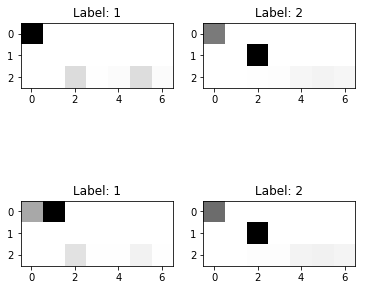

In [6]:
print(X_train.shape)
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%Y_train.iloc[i])
    plt.imshow(X_train.iloc[i].values.reshape(3,7),cmap='Greys');

In [7]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_train.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
5131,-0.078281,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,1.095523,-1.496606,-1.479783,0.705416,-1.553964
8918,0.449532,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,2.891776,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.354850,0.182772,-0.093179,-0.218718,-0.056722
7174,-0.394968,1.721798,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,2.195612,-1.245953,-1.647132,0.107447,-1.674709
10443,0.713439,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,2.891776,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.313127,0.182772,0.480588,0.705416,0.184768
7285,1.135689,1.721798,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.366790,-0.368666,0.528402,-0.436161,0.691898


In [8]:
X_test = pd.read_csv('ann-test.data', header=None, sep=" ") 
Y_test=X_test[21]
X_test.drop([21,22,23],axis=1, inplace=True)

print("Classes -> number of representatives:")
print(Y_test.value_counts())
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
print("test data shape: ",X_test.shape)
X_test.head()

Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64
test data shape:  (3428, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.186687,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.392280,1.511235,0.767471,1.629549,0.136470
1,-1.028344,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.456675,0.383295,0.121983,-1.251573,0.667749
2,-0.870000,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.474116,1.887215,3.827563,-0.055635,3.855424
3,-1.608938,-0.580788,-0.283198,-0.099326,-0.072371,-0.181562,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.460700,0.257968,0.193704,-0.707965,0.474557
4,-1.556156,-0.580788,-0.283198,-0.099326,-0.072371,5.507747,-0.070396,-0.108036,-0.130877,-0.345808,...,-0.057972,-0.055496,-0.162345,-0.009646,-0.176301,-0.468749,0.759275,1.317331,1.846993,0.474557


Text(0.5, 1.0, 'Density Plot for continues features in Training Dataset')

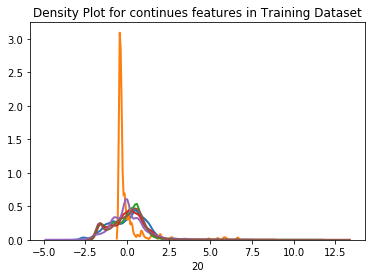

In [9]:
# Iterate through the features
for i in [0,16,17,18,19,20]:
    # Draw the density plot
    sns.distplot(X_train[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for continues features in Training Dataset')

Text(0.5, 1.0, 'Density Plot for continues features in Test Dataset')

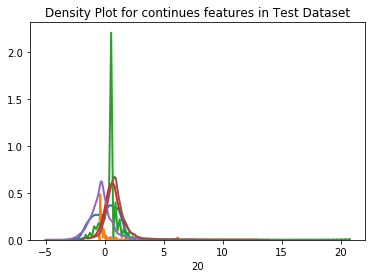

In [10]:
# Iterate through the features
for i in [0,16,17,18,19,20]:
    # Draw the density plot
    sns.distplot(X_test[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 2})
    
plt.title('Density Plot for continues features in Test Dataset')

In [11]:
## Changing labels to one-hot encoded vector
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(Y_train)
y_test_one_hot = lb.transform(Y_test)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)

Train labels dimension:
(10748, 3)
Test labels dimension:
(3428, 3)


Now we have processed the data, let's start building our multi-layer perceptron using tensorflow. We will begin by importing the required libraries.

In [12]:
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Define & Compile Keras Model for Hyper-Parameter Optimization

In [13]:
# Defining various initialization parameters for MLP model
num_features = X_train.shape[1]; num_classes = y_train_one_hot.shape[1] 

# Let's create a helper function first which builds the model with various parameters.
def get_model(dense_0_neurons, dense_1_neurons, dropout_rate, input_dim, num_classes):
    # Builds a Sequential MLP model using Keras and returns it
    
    # Define the keras model
    model = Sequential()
    model.add(Dense(dense_0_neurons, input_dim=input_dim, activation='relu', name="dense_1"))
    model.add(Dense(dense_1_neurons, activation='relu', name="dense_2"))
    model.add(Dropout(dropout_rate, name="dropout"))
    model.add(Dense(num_classes, activation='sigmoid', name="dense_3"))
    return model

### Setup Keras Model for Scikit-Optimizer

In [14]:
import skopt
from skopt import gp_minimize

# Specify `Static' Parameters
STATIC_PARAMS = {num_features, num_classes}

# Bounded region of parameter space
# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the dropout_rate)
SPACE = [skopt.space.Integer(8, 128, name='dense_0_neurons'),
         skopt.space.Integer(8, 256, name='dense_1_neurons'),
        skopt.space.Real(0.0, 0.8, name='dropout_rate')]

# This decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters         
@skopt.utils.use_named_args(SPACE)
         
# Define objective for optimization
def objective(**params):
  
    # All parameters: 
    #all_params = {**params, **STATIC_PARAMS}
    
    # Create the model using a specified hyperparameters.
    #model = get_model(all_params)
    model = get_model(params["dense_0_neurons"], params["dense_1_neurons"], params["dropout_rate"], num_features, num_classes)

    # Compile the keras model for a specified number of epochs.
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])

    # Fit keras model
    history = model.fit(X_train, y_train_one_hot, epochs=2, batch_size=128, 
                        validation_split = 0.20, verbose=1)

    # Evaluate the model with the eval dataset.
    score = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=128, verbose=1)
    print('Test loss:', score[0], '   Test accuracy:', score[1])

    # Return the accuracy.
    return -1.0 * score[1]

print(STATIC_PARAMS)

{3, 21}


### Run Scikit-Optimizer
There are several methods for optimization: https://scikit-optimize.github.io/modules/minimize_functions.html#minimize-functions

In [15]:
import warnings
warnings.filterwarnings('ignore')

results_gp = skopt.gbrt_minimize(objective,     # the function to minimize
                          SPACE,              # the bounds on each dimension of x
                          x0=[100,50,0],      # the starting point
                          acq_func="LCB",     # the acquisition function (optional)
                          n_calls=50,         # the number of evaluations of f including at x0
                          n_random_starts=4,  # the number of random initialization points
                          random_state=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 0s 37us/step - loss: 0.7731 - categorical_accuracy: 0.6864 - val_loss: 0.4848 - val_categorical_accuracy: 0.7772
Epoch 2/2
3428/3428 [==============================] - 0s 5us/step
Test loss: nan    Test accuracy: 0.021295215856270863
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 0s 54us/step - loss: 0.9339 - categorical_accuracy: 0.5495 - val_loss: 0.6824 - val_categorical_accuracy: 0.7512
Epoch 2/2
3428/3428 [==============================] - 0s 5us/step
Test loss: 0.6660373001560447    Test accuracy: 0.7435822637801688
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [=========

Epoch 2/2
3428/3428 [==============================] - 0s 6us/step
Test loss: 0.7206458913264503    Test accuracy: 0.5110851805505007
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 1s 115us/step - loss: 0.9385 - categorical_accuracy: 0.5896 - val_loss: 0.7348 - val_categorical_accuracy: 0.7321
Epoch 2/2
3428/3428 [==============================] - 0s 7us/step
Test loss: 0.6965215137986903    Test accuracy: 0.7637106190623592
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 1s 120us/step - loss: 0.9019 - categorical_accuracy: 0.5879 - val_loss: 0.6747 - val_categorical_accuracy: 0.6795
Epoch 2/2
3428/3428 [==============================] - 0s 6us/step
Test loss: 0.728051942037451    Test accuracy: 0.2619603266515698
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 1s 125us/step - loss: 0.9228 - categorical_accuracy: 0.5928 - 

3428/3428 [==============================] - 0s 7us/step
Test loss: 0.524309225580378    Test accuracy: 0.8439323216363736
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 2s 203us/step - loss: 0.9004 - categorical_accuracy: 0.5755 - val_loss: 0.6252 - val_categorical_accuracy: 0.7553
Epoch 2/2
3428/3428 [==============================] - 0s 8us/step
Test loss: 0.6139434675491537    Test accuracy: 0.8127187871599142
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 2s 206us/step - loss: 0.8931 - categorical_accuracy: 0.5983 - val_loss: 0.6363 - val_categorical_accuracy: 0.7279
Epoch 2/2
3428/3428 [==============================] - 0s 7us/step
Test loss: 0.7062994268839111    Test accuracy: 0.7794632439435294
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 2s 216us/step - loss: 0.8885 - categorical_accuracy: 0.5841 - val_loss: 

3428/3428 [==============================] - 0s 8us/step
Test loss: nan    Test accuracy: 0.021295215856270863
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 3s 295us/step - loss: 0.7606 - categorical_accuracy: 0.6577 - val_loss: 0.4807 - val_categorical_accuracy: 0.7781
Epoch 2/2
3428/3428 [==============================] - 0s 9us/step
Test loss: 0.5437313855181218    Test accuracy: 0.8200116693069387
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 3s 303us/step - loss: 0.7352 - categorical_accuracy: 0.6654 - val_loss: 0.4769 - val_categorical_accuracy: 0.8042
Epoch 2/2
3428/3428 [==============================] - 0s 11us/step
Test loss: 0.5484428420367291    Test accuracy: 0.8071761955458197
Train on 8598 samples, validate on 2150 samples
Epoch 1/2
8598/8598 [==============================] - 3s 308us/step - loss: 0.8125 - categorical_accuracy: 0.6456 - val_loss: 0.5831 - va

#### Get Best Parameter Set

In [16]:
print("Best score=%.4f" % results_gp.fun)

print("""Best parameters:
- dense_0_neurons=%d
- dense_1_neurons=%d
- dropout_rate=%.6f""" % 
      (results_gp.x[0], results_gp.x[1],
                            results_gp.x[2]))

Best score=-0.8967
Best parameters:
- dense_0_neurons=88
- dense_1_neurons=29
- dropout_rate=0.760514


#### Convergence Plot

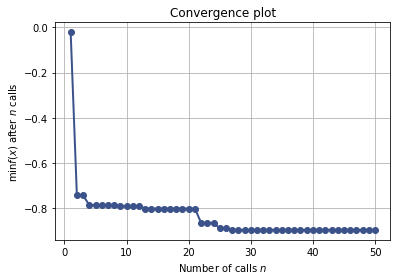

In [17]:
from skopt.plots import plot_convergence
plot_convergence(results_gp)

#### Evaluations Plot
plots.plot_evaluations creates a grid of size n_dims by n_dims. The diagonal shows histograms for each of the dimensions. In the lower triangle (just one plot in this case) a two dimensional scatter plot of all points is shown. The order in which points were evaluated is encoded in the color of each point. Darker/purple colors correspond to earlier samples and lighter/yellow colors correspond to later samples. A red point shows the location of the minimum found by the optimization process.

You should be able to see that points start clustering around the location of the true miminum. The histograms show that the objective is evaluated more often at locations near to one of the three minima.

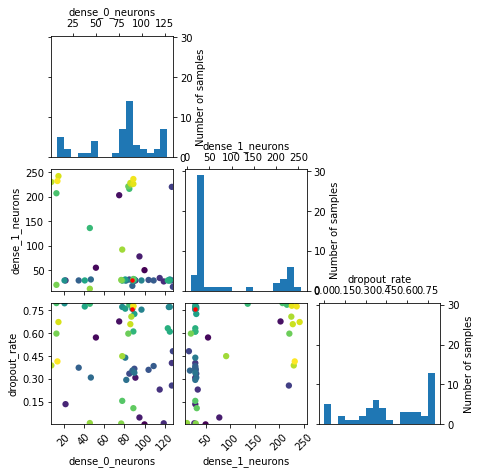

In [18]:
from skopt.plots import plot_evaluations
_ = plot_evaluations(results_gp, bins=16)

#### Objective Partial Dependence Plots
Partial dependence plots were proposed by [Friedman (2001)] as a method for interpreting the importance of input features used in gradient boosting machines. The idea is to visualize how the value of $i$-th variable $x_i$ influences the function $f$ after averaging out the influence of all other variables.For more details see: https://christophm.github.io/interpretable-ml-book/pdp.html

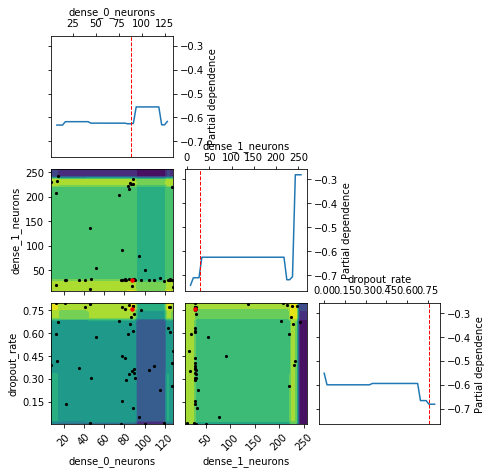

In [19]:
from skopt.plots import plot_objective
_ = plot_objective(results_gp)

### Learn Further using Best Hyper-parameter Settings

In [35]:
# Create the model using a specified hyperparameters.

# Get best hyper-parameters
dense_0_neurons=results_gp.x[0]; dense_1_neurons=results_gp.x[1]; dropout_rate=results_gp.x[2]

# Build 
model = get_model(dense_0_neurons, dense_1_neurons, dropout_rate, num_features, num_classes)

# Compile the keras model for a specified number of epochs.
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])

# Fit keras model
history = model.fit(X_train, y_train_one_hot, epochs=16, batch_size=8, 
                        validation_split = 0.20, verbose=1)

# Evaluate the model with the eval dataset.
score = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=128, verbose=1)
print('Test loss:', score[0], '   Test accuracy:', score[1])

Train on 8598 samples, validate on 2150 samples
Epoch 1/16
8598/8598 [==============================] - 5s 606us/step - loss: 0.7143 - categorical_accuracy: 0.6181 - val_loss: 0.4829 - val_categorical_accuracy: 0.8047
Epoch 2/16
8598/8598 [==============================] - 2s 282us/step - loss: 0.5498 - categorical_accuracy: 0.7016 - val_loss: 0.4238 - val_categorical_accuracy: 0.8177
Epoch 3/16
8598/8598 [==============================] - 2s 265us/step - loss: 0.5006 - categorical_accuracy: 0.7326 - val_loss: 0.3835 - val_categorical_accuracy: 0.8535
Epoch 4/16
8598/8598 [==============================] - 2s 270us/step - loss: 0.4508 - categorical_accuracy: 0.7754 - val_loss: 0.3332 - val_categorical_accuracy: 0.8581
Epoch 5/16
8598/8598 [==============================] - 3s 306us/step - loss: 0.4321 - categorical_accuracy: 0.7851 - val_loss: 0.2995 - val_categorical_accuracy: 0.8884
Epoch 6/16
8598/8598 [==============================] - 2s 239us/step - loss: 0.4008 - categorical_acc

### Check Training History
In this section, we will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting. Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

In [31]:
# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'categorical_accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(1,2,n+1)
    plt.tight_layout()
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

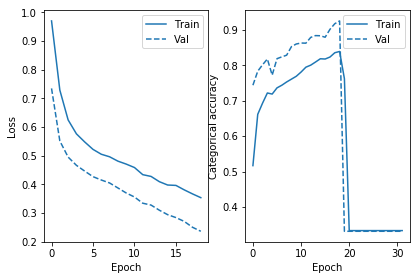

In [32]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history)

### Evaluate Metrics
You can use a confusion matrix to summarize the actual vs. predicted labels where the X axis is the predicted label and the Y axis is the actual label.

In [33]:
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

Evaluate your model on the test dataset and display the evaluation metrics and the confusion matrix.

3428/3428 [==============================] - 0s 13us/step
loss :  nan
categorical_accuracy :  0.021295215856270863



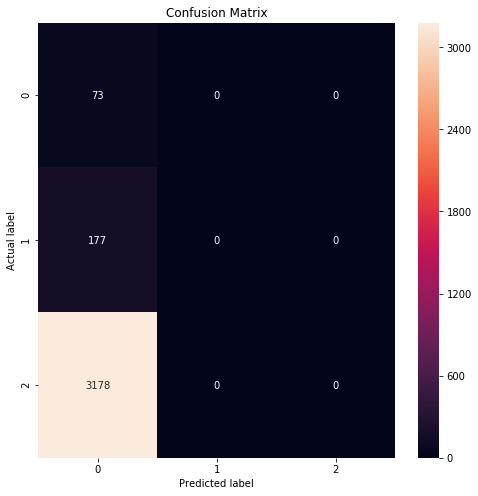

In [34]:
y_test_predictions = model.predict_classes(X_test, batch_size=128)
baseline_results = model.evaluate(X_test, y_test_one_hot,
                                  batch_size=128, verbose=1)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(Y_test, y_test_predictions+1)